# Replacing parts of satellite images
In this notebook we load a satellite image and replace a part of it.

In [1]:
from skimage.io import imread
from darth_d import replace
import stackview
import numpy as np

Image credits: modified Copernicus Sentinel data (2017), [CC BY-SA 3.0 IGO](https://creativecommons.org/licenses/by-sa/3.0/igo/). [Source](https://open.esa.int/copernicus-sentinel-satellite-imagery-under-open-licence/)

StackViewNDArray([[[133, 142, 141],
                   [140, 149, 148],
                   [149, 155, 155],
                   ...,
                   [ 28,  58,  84],
                   [ 49,  79, 105],
                   [ 30,  58,  80]],

                  [[119, 128, 127],
                   [128, 137, 136],
                   [137, 143, 143],
                   ...,
                   [ 55,  86, 114],
                   [ 30,  60,  86],
                   [ 37,  67,  91]],

                  [[126, 132, 132],
                   [130, 136, 136],
                   [128, 133, 136],
                   ...,
                   [ 38,  72, 100],
                   [ 39,  70,  98],
                   [ 19,  49,  75]],

                  ...,

                  [[230, 230, 232],
                   [230, 230, 232],
                   [229, 229, 231],
                   ...,
                   [219, 214, 211],
                   [221, 216, 213],
                   [229, 224, 221]],

                  [[229, 229, 231],
                   [229, 229, 231],
                   [229, 229, 231],
                   ...,
                   [220, 215, 212],
                   [222, 217, 214],
                   [224, 219, 216]],

                  [[230, 230, 232],
                   [230, 230, 232],
                   [229, 229, 231],
                   ...,
                   [219, 214, 211],
                   [221, 216, 213],
                   [219, 214, 211]]], dtype=uint8)
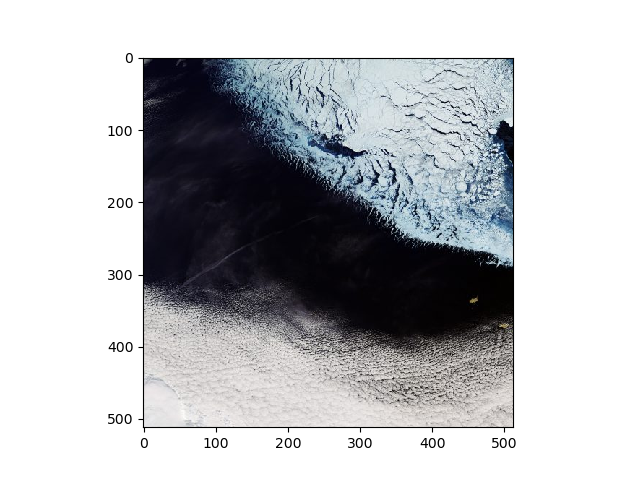
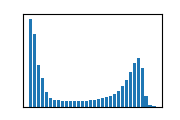

In [2]:
image = imread("https://open.esa.int/files/2017/05/Bering_Sea-768x779.jpg")[:512, :512]
stackview.insight(image)

We define a binary mask of the region we would like to replace.

In [3]:
labels = np.zeros(image.shape[:2])
labels[100:300, 200:400] = 1
stackview.curtain(image, labels, alpha=0.6)

We replace the image, and also specify its size.

c:\structure\code\darth-d\darth_d\_replace.py:36: UserWarning: Using the replace function on scientific images could be seen as scientific misconduct. Handle this function with care.
  warn("Using the replace function on scientific images could be seen as scientific misconduct. Handle this function with care.")


StackViewNDArray([[[133, 142, 141],
                   [140, 149, 147],
                   [149, 155, 155],
                   ...,
                   [ 28,  58,  84],
                   [ 48,  79, 105],
                   [ 30,  58,  80]],

                  [[119, 128, 127],
                   [128, 137, 136],
                   [137, 143, 143],
                   ...,
                   [ 55,  86, 113],
                   [ 30,  60,  86],
                   [ 36,  67,  91]],

                  [[126, 131, 131],
                   [130, 136, 136],
                   [128, 133, 136],
                   ...,
                   [ 38,  72, 100],
                   [ 39,  70,  97],
                   [ 19,  48,  75]],

                  ...,

                  [[230, 230, 232],
                   [230, 230, 232],
                   [229, 229, 231],
                   ...,
                   [219, 214, 211],
                   [221, 216, 213],
                   [229, 224, 221]],

                  [[229, 229, 231],
                   [229, 229, 231],
                   [229, 229, 231],
                   ...,
                   [220, 215, 211],
                   [222, 217, 214],
                   [224, 219, 216]],

                  [[230, 230, 232],
                   [230, 230, 232],
                   [229, 229, 231],
                   ...,
                   [219, 214, 211],
                   [221, 216, 213],
                   [219, 214, 211]]], dtype=uint8)
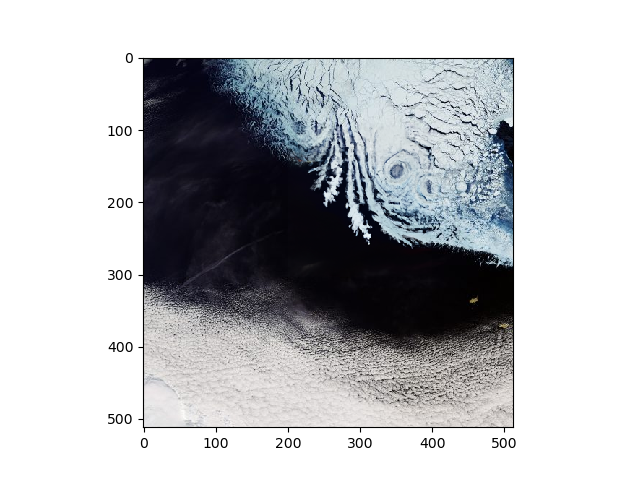
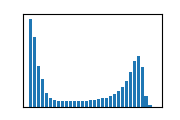

In [4]:
replaced_image = replace(image, labels, image_size=512)
replaced_image

In [5]:
stackview.curtain(image, replaced_image)